# Dive into NFL based Data and Analytics 

In [138]:
# By Tyran Johnson
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
# All data collected on players is year by year, not by season. Each year a team plays 14-15 games, and 2-3 games in the following year
# First lets pull some data and start solving some questions. 

df = pd.read_csv("./FOOTBALL/nfl_offense_stats.csv")
df.head()


,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
0,Garrett Bradbury,2022,C,MIN,0,0,0,0,0,0,...,37,False,outdoors,grass,11,60,9,-13.0,GNB,42.5
1,C.J. Goodwin,2022,CB,DAL,0,0,0,0,0,0,...,17,False,retractable roof (closed),matrixturf,72,45,0,-3.0,DAL,51.0
2,Adam Prentice,2022,FB,NOR,0,0,0,0,0,0,...,18,False,dome,sportturf,72,45,0,-6.5,NOR,37.5
3,Adam Prentice,2022,FB,NOR,0,0,0,0,0,0,...,20,False,retractable roof (closed),fieldturf,72,45,0,-3.5,NOR,40.0
4,Andy Janovich,2022,FB,CLE,0,0,0,0,0,0,...,26,False,outdoors,grass,25,60,12,-2.0,PIT,42.0


In [140]:
nfl = df

In [141]:
# theres a ton of columns in the df. Here is a way to see all the column names
nfl.head().T

,0,1,2,3,4
player,Garrett Bradbury,C.J. Goodwin,Adam Prentice,Adam Prentice,Andy Janovich
year,2022,2022,2022,2022,2022
position,C,CB,FB,FB,FB
team,MIN,DAL,NOR,NOR,CLE
pass_cmp,0,0,0,0,0
...,...,...,...,...,...
Humidity,60,45,45,45,60
wind_speed,9,0,0,0,12
vegas_line,-13.0,-3.0,-6.5,-3.5,-2.0
vegas_favorite,GNB,DAL,NOR,NOR,PIT


In [142]:
## Average recieving YAC yards. 
nfl.iloc[:,47:53].apply(np.mean)

rush_broken_tackles     0.145096
rec_air_yds            21.977875
rec_yac                 9.532569
rec_drops               0.133731
offense                32.708857
off_pct                48.993691
dtype: float64

# The average rec yac does not factor out all players that do no have a at least one reception. For example, QBs and other postitions are listed in the average

In [143]:
# This is the max rec Yac from 2019 to 2022 by any postion
nfl.iloc[:,47:53].apply(np.max)

rush_broken_tackles     11.0
rec_air_yds            320.6
rec_yac                153.0
rec_drops                6.0
offense                100.0
off_pct                100.0
dtype: float64

In [144]:
## The most rec yac from 2019 to 2022 seasons was 153 yards. In a single game. By Jamaar Chase!!! GEAUX TIGERS

# Task 1: Find the average rec yac of only pass catchers. Mininum of at least one target.

In [145]:
nfl_max_yac = nfl.iloc[:,49:50].apply(np.max)

In [146]:
# Im all over the place. This is the max rec yac.
nfl_max_yac = nfl.iloc[:,49:50].apply(np.max)
print(nfl_max_yac)

rec_yac    153
dtype: int64


In [147]:
# This was simpler to solve using excel. The average rec yec = 17.36. Now what I want to try is solving this using numpy
mean_yac = (nfl['rec_yac'].loc[nfl['rec_yac'] != 0]).mean()
print(mean_yac)

17.35904449307075


# Task 2: Which QBs had the most 300+ passing games? List the top 5 as well.

In [148]:
# First I will try to set a value of 300+ passing yards.
nfl_qb_top_tier = nfl['pass_yds'] >=300
nfl[nfl_qb_top_tier]

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
46,Joe Burrow,2022,QB,CIN,30,39,446,4,0,4,...,34,False,outdoors,fieldturf,33,81,13,-4.0,KAN,51.5
47,Tom Brady,2022,QB,TAM,34,50,410,3,1,1,...,24,False,outdoors,fieldturf,57,82,9,-13.5,TAM,45.5
48,Patrick Mahomes,2022,QB,KAN,30,39,404,5,1,3,...,42,False,outdoors,grass,30,78,8,-12.5,KAN,46.5
49,Justin Herbert,2022,QB,LAC,34,64,383,3,1,3,...,35,True,dome,grass,72,45,0,-3.0,LAC,49.0
50,Patrick Mahomes,2022,QB,KAN,33,44,378,3,0,2,...,42,True,outdoors,grass,35,54,6,-2.0,KAN,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14292,Dak Prescott,2019,QB,DAL,23,33,303,4,0,3,...,47,False,retractable roof (closed),fieldturf,72,45,0,-12.5,DAL,47.5
14293,Joe Flacco,2019,QB,DEN,22,38,303,3,1,0,...,24,False,outdoors,grass,87,11,14,-2.5,DEN,37.0
14294,Daniel Jones,2019,QB,NYG,28,47,301,1,1,4,...,17,False,outdoors,fieldturf,42,69,5,-4.0,PHI,44.0
14295,Jameis Winston,2019,QB,TAM,21,43,301,2,2,3,...,27,False,outdoors,grass,59,67,3,-2.0,TEN,45.5


In [149]:
# Here is a second way to get the same table which shows all passing yards of 300 and greater.
# nfl.query('pass_yds >=300')

In [150]:
nfl_qb = nfl[nfl_qb_top_tier]

In [151]:
# Now I will try to count exactly how many times each player had over 300 passing yards in a game
nfl_qb = nfl_qb.sort_values(by="pass_yds", ascending=False)

In [152]:
new_qb_df = nfl_qb.sort_values(by="pass_yds", ascending=False)

In [153]:
results = new_qb_df['player'].value_counts()

In [154]:
# The above shows leaders for the most 300 more passing yards in a game from 2019 to 2022.

In [155]:
def my_first_function(a, b, c):
    if a > b:
        return("LEGENDARY")
    if b > c:
        return("ELITE")
    return("GOOD")

results.head()

Patrick Mahomes    25
Tom Brady          23
Matt Ryan          20
Josh Allen         17
Justin Herbert     17
Name: player, dtype: int64

<AxesSubplot:>

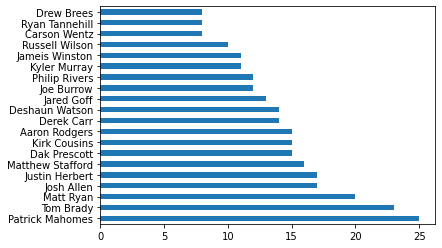

In [156]:
# heres a bar graph for players with the most 300 or more yards thrown in a game since 2019.
new_qb_df['player'].value_counts()[:20].plot(kind='barh')

In [157]:
# This is to test pulling a column from the dataset. In this case, I want to view the pass_td
nfl_stats = pd.io.parsers.read_csv("./FOOTBALL/nfl_offense_stats.csv")
X = nfl_stats[['pass_td']]
print(X)

       pass_td
0            0
1            0
2            0
3            0
4            0
...        ...
19968        0
19969        0
19970        0
19971        0
19972        0

[19973 rows x 1 columns]


In [158]:
# The above looks great. Here is how to view it as a list
nfl_stats = pd.io.parsers.read_csv("./FOOTBALL/nfl_offense_stats.csv")
X = nfl_stats[['pass_td']].values
print(X)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [159]:
print(pd.__version__)

1.4.2


In [160]:
pip install pandas --upgrade

Note: you may need to restart the kernel to use updated packages.


In [161]:
# All the occurrences a QB has thrown for 3 tds or more in a game.
# if you want to just see the names, put in 'player' at the end. 
nfl.loc[nfl['pass_td'] >= 3,]

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
46,Joe Burrow,2022,QB,CIN,30,39,446,4,0,4,...,34,False,outdoors,fieldturf,33,81,13,-4.0,KAN,51.5
47,Tom Brady,2022,QB,TAM,34,50,410,3,1,1,...,24,False,outdoors,fieldturf,57,82,9,-13.5,TAM,45.5
48,Patrick Mahomes,2022,QB,KAN,30,39,404,5,1,3,...,42,False,outdoors,grass,30,78,8,-12.5,KAN,46.5
49,Justin Herbert,2022,QB,LAC,34,64,383,3,1,3,...,35,True,dome,grass,72,45,0,-3.0,LAC,49.0
50,Patrick Mahomes,2022,QB,KAN,33,44,378,3,0,2,...,42,True,outdoors,grass,35,54,6,-2.0,KAN,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,Lamar Jackson,2019,QB,BAL,15,20,169,5,0,2,...,6,False,outdoors,grass,62,64,5,-3.5,BAL,47.0
14597,Brian Hoyer,2019,QB,IND,17,26,168,3,1,4,...,26,False,outdoors,grass,48,47,12,-1.0,PIT,39.5
14612,Carson Wentz,2019,QB,PHI,16,27,160,3,0,0,...,27,False,outdoors,grass,60,62,3,-3.5,GNB,46.0
14633,Jacoby Brissett,2019,QB,IND,17,28,146,3,1,3,...,17,False,outdoors,grass,93,45,1,-3.0,TEN,43.5


# Task 3: Lets look at some QB data to see wh all threw for more touchdowns than turnoevers

In [162]:
# This is what I got so far. I will need to work on cleaning up my results to show only QB stats
nfl[nfl['position'].isin(['QB'])]
qb_data = nfl[nfl['position'].isin(['QB'])]
qb_data.query('pass_td > fumbles_lost + pass_int')

,player,year,position,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_score,ot,roof,surface,temperature,Humidity,wind_speed,vegas_line,vegas_favorite,over_under
46,Joe Burrow,2022,QB,CIN,30,39,446,4,0,4,...,34,False,outdoors,fieldturf,33,81,13,-4.0,KAN,51.5
47,Tom Brady,2022,QB,TAM,34,50,410,3,1,1,...,24,False,outdoors,fieldturf,57,82,9,-13.5,TAM,45.5
48,Patrick Mahomes,2022,QB,KAN,30,39,404,5,1,3,...,42,False,outdoors,grass,30,78,8,-12.5,KAN,46.5
49,Justin Herbert,2022,QB,LAC,34,64,383,3,1,3,...,35,True,dome,grass,72,45,0,-3.0,LAC,49.0
50,Patrick Mahomes,2022,QB,KAN,33,44,378,3,0,2,...,42,True,outdoors,grass,35,54,6,-2.0,KAN,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,Matt Schaub,2019,QB,ATL,6,6,65,1,0,0,...,10,False,retractable roof (open),fieldturf,72,45,0,-3.0,LAR,54.5
14691,Matt Schaub,2019,QB,ATL,5,9,55,1,0,0,...,22,False,retractable roof (closed),fieldturf,72,45,0,-3.5,ATL,51.5
14692,Robert Griffin III,2019,QB,BAL,6,6,55,1,0,0,...,10,False,outdoors,grass,91,56,8,-7.0,BAL,41.0
14697,Mike Glennon,2019,QB,LVR,2,3,36,1,0,0,...,42,False,outdoors,grass,55,74,6,-5.5,GNB,48.0


# Task 4: Filter out the data to where you are only observing offensive players only

In [163]:
# This syntax shows a dataframse of the primary offensive skill positions
nfl[nfl['position'].isin(['QB', 'WR', 'RB', 'HB', 'FB', 'TE'])]
offensive_skill = nfl[nfl['position'].isin(['QB', 'WR', 'RB', 'HB', 'FB', 'TE'])]

In [164]:
# This will only show QB data
nfl[nfl['position'].isin(['QB'])]
qb_data = nfl[nfl['position'].isin(['QB'])]

In [165]:
# WRs only
nfl[nfl['position'].isin(['WR'])]
wr_data = nfl[nfl['position'].isin(['WR'])]

In [166]:
rec_yac = wr_data.groupby(wr_data['player']).aggregate({'rec_yac': 'sum'})
rec_yac.sort_values(by=['rec_yac'],ascending = False).head(5)

,rec_yac
player,
Cooper Kupp,2122
Deebo Samuel,1841
Davante Adams,1786
Chris Godwin,1547
Tyreek Hill,1516


In [206]:
# Yards per reception shows how many yards a receiver gain by every catch. 
wr_stats['yards_per_rec'] = wr_stats['rec_yds'] / wr_stats['rec']

# YAC Percentage. Percent of total yards that come after catch. 
wr_stats['yac_pct'] = wr_stats['rec_yac'] / wr_stats['rec_yds'] * 100

# Catch percentage will represent the percent of catches a playes gets. These numbers can vary
wr_stats['catch_p'] = wr_stats['rec'] / wr_stats['targets'] * 100
wr1 = wr_stats.round(decimals = 2)

In [207]:
wr1.sort_values(by='rec_yds', ascending=False).head(10)

,rec,rec_yds,rec_td,rec_long,rush_td,rec_yac,targets,yards_per_rec,yac_pct,catch_pct
player,,,,,,,,,,
Cooper Kupp,182,2503,22,70,0,1059,242,13.75,42.31,75.21
Tyreek Hill,158,1879,12,75,0,765,218,11.89,40.71,72.48
Ja'Marr Chase,106,1823,14,82,0,822,163,17.20,45.09,65.03
Davante Adams,156,1822,14,59,0,696,211,11.68,38.20,73.93
Justin Jefferson,117,1749,10,56,0,531,179,14.95,30.36,65.36
Stefon Diggs,136,1679,12,61,0,449,213,12.35,26.74,63.85
Deebo Samuel,87,1559,7,83,9,922,135,17.92,59.14,64.44
Mike Evans,105,1521,18,55,0,380,166,14.49,24.98,63.25
Chris Godwin,119,1468,8,52,1,724,166,12.34,49.32,71.69


In [222]:
# Here is the percentage of yards after catch for the top 25 wrs. 
top_wr['rec_yac'] / top_wr['rec_yds'] * 100
# Hey look at Jarvis Landry sitting at 49.8% of yards after the catch. I cant wait to see what he can do for the BLACK & GOLD!!

In [260]:
import math

# I'm going to attempt to calculate percentiles of yards for WRs. 

def my_percentile(top_wr, percentile):
    n = len(wr1.rec_yds)
    p = n * percentile/100
    if p.is_integer():
        return sorted(wr1.rec_yds)[int(p)]
    else:
        return sorted(wr1.rec_yds)[int(math.ceil(p)) - 1]

dist = np.random.randn(10)
index = [5, 25, 50, 75, 95]
perc_func = [my_percentile(dist, i) for i in index]
print(perc_func)
# Key: There is a huge jump in percentile from WRs in the 75 and 95 percent. 

[0, 21, 148, 507, 1245]


In [211]:
# Top receivers in the league in yards.

new_wr_data = wr_data[wr_data['year'].isin([2022, 2021])]
wr_stats = new_wr_data.groupby(new_wr_data['player']).aggregate({'rec': 'sum', 'rec_yds': 'sum', 'rec_td': 'sum', 'rec_long': 'max', 'rush_td': 'sum', 'rec_yac': 'sum', 'targets': 'sum'})
top_wr = wr_stats.sort_values(by='rec_yds', ascending=False).iloc[0:50]


In [171]:
# Who leads in YAC from 2019-2022?
wr_data.sort_values(by=['rec_yac', 'rec', 'rec_yds'])

more_results = wr_data.groupby('player')['rec_yac'].sum()


In [172]:
# RBs & HBs
nfl[nfl['position'].isin(['RB', 'HB'])]
rbs_data = nfl[nfl['position'].isin(['RB', 'HB'])]

In [173]:
rb_data = rbs_data[rbs_data['year'].isin([2022, 2021])]

In [174]:
highest_rushers_2021 = rb_data.groupby(rbs_data['player']).aggregate({'rush_yds': 'sum', 'rush_td': 'sum', 'rec': 'sum'})
high_low_rushers = highest_rushers_2021.sort_values(by='rush_yds', ascending=False)
#These are the top 10 rushers for 2021
high_low_rushers.iloc[0:10]

,rush_yds,rush_td,rec
player,,,
Jonathan Taylor,2142,21,43
Nick Chubb,1512,9,26
Joe Mixon,1467,14,60
Derrick Henry,1292,13,21
Najee Harris,1229,7,76
Leonard Fournette,1176,13,98
Dalvin Cook,1159,6,34
Antonio Gibson,1143,7,45
Elijah Mitchell,1132,6,26


In [175]:
# Ill just loom into the top 50 rushers when comparing numbers for now
top_50_rushers = high_low_rushers.iloc[0:50]

In [176]:
# This is the table of the top 50 backs of 2021
all_rb_data = rb_data.groupby(rbs_data['player']).aggregate({'rush_att': 'sum', 'rush_yds': 'sum', 'rush_td': 'sum', 'rec': 'sum', 'rec_yds': 'sum', 'rec_td': 'sum'})
all_rb_data.sort_values(by='rush_yds', ascending=False).iloc[0:25]
td_sum = all_rb_data["rec_td"] + all_rb_data["rush_td"]
all_rb_data["total_tds"] = td_sum
new_rb_data = all_rb_data.sort_values(by='rush_yds', ascending=False).iloc[0:50]
new_rb_data.head()

,rush_att,rush_yds,rush_td,rec,rec_yds,rec_td,total_tds
player,,,,,,,
Jonathan Taylor,383,2142,21,43,367,2,23
Nick Chubb,273,1512,9,26,247,2,11
Joe Mixon,359,1467,14,60,421,3,17
Derrick Henry,291,1292,13,21,165,0,13
Najee Harris,319,1229,7,76,466,3,10


In [177]:
# YPC for the top 50
ypc = new_rb_data['rush_yds'] / new_rb_data['rush_att']
new_rb_data["ypc"] = ypc
new_rb_data = new_rb_data.round(2)
new_rb_data.head()

,rush_att,rush_yds,rush_td,rec,rec_yds,rec_td,total_tds,ypc
player,,,,,,,,
Jonathan Taylor,383,2142,21,43,367,2,23,5.59
Nick Chubb,273,1512,9,26,247,2,11,5.54
Joe Mixon,359,1467,14,60,421,3,17,4.09
Derrick Henry,291,1292,13,21,165,0,13,4.44
Najee Harris,319,1229,7,76,466,3,10,3.85


In [178]:
# Here are the averages accross the board for rbs 2021-2022
new_rb_data.describe(include='all').round(2)

,rush_att,rush_yds,rush_td,rec,rec_yds,rec_td,total_tds,ypc
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,194.88,848.78,6.68,38.82,288.58,1.60,8.28,4.38
std,68.33,323.53,4.31,18.95,149.41,1.86,5.06,0.57
min,99.00,442.00,0.00,6.00,48.00,0.00,0.00,3.51
25%,144.75,617.25,4.00,26.00,175.25,0.00,5.00,4.03
50%,172.50,757.50,6.00,35.50,265.50,1.00,8.00,4.34
75%,248.00,1035.75,8.00,51.00,366.25,2.00,11.00,4.60
max,383.00,2142.00,21.00,98.00,680.00,9.00,23.00,6.14


In [179]:
# Top 10 YPC leaders 2021-2022
new_ypc = new_rb_data.sort_values(by='ypc', ascending=False)
new_ypc.ypc.head(10)

player
Rashaad Penny       6.14
Jonathan Taylor     5.59
Nick Chubb          5.54
Tony Pollard        5.38
Miles Sanders       5.35
D'Ernest Johnson    5.34
Kareem Hunt         4.93
Chase Edmonds       4.86
Aaron Jones         4.71
James Robinson      4.68
Name: ypc, dtype: float64

In [180]:
# TE's only
nfl[nfl['position'].isin(['TE'])]
te_data = nfl[nfl['position'].isin(['TE'])]

In [326]:
# The only TEs to produce over 2000 yards over the last 3 full seasons. 
te_stats = te_data.groupby(te_data['player']).aggregate({'rec': 'sum', 'rec_yds': 'sum', 'rec_td': 'sum', 'rec_long': 'max', 'rush_td': 'sum', 'rec_yac': 'sum', 'targets': 'sum'})
top_te = te_stats[(te_stats['rec_yds'] > 2000)]
print(top_te)

                rec  rec_yds  rec_td  rec_long  rush_td  rec_yac  targets
player                                                                   
Dallas Goedert  173     2126      12        45        0      974      248
Darren Waller   259     3082      14        75        0     1400      367
George Kittle   215     2740      14        61        0     1417      284
Mark Andrews    241     3022      26        51        0      963      363
Mike Gesicki    177     2053      13        70        0      550      286
Travis Kelce    361     4593      34        69        2     1899      498
Zach Ertz       203     2079      12        47        0      721      327


# Task 5: Solve some questions that provide factors to win/lose probability.

In [181]:
# Lets first try to define wins and losses. Since the data takes in every play, there is duplicate data for scores that exist.
# I will create a new column to the dataframe outlining which team (visitor or home) won. 


conditions = [nfl['vis_score'] > nfl['home_score'],
              nfl['vis_score'] < nfl['home_score']]

choices = ['visitor', 'home']

nfl['winning_team'] = np.select(conditions, choices, default='tie')


In [182]:
# Lets get rid of duplicate games since the dataframe is factoring in players from the same team.
# Below are 5 different variables that will remain constant for duplicates.

wins_losses_data = nfl[['year', 'vis_team', 'home_team', 'home_score', 'vis_score', 'winning_team']]
wins_loss_data = wins_losses_data.drop_duplicates()
wins_loss_data

# The data below shows all regular season and playoff games from 2019 to 2022. 


,year,vis_team,home_team,home_score,vis_score,winning_team
0,2022,MIN,GNB,37,10,home
1,2022,SFO,DAL,17,23,visitor
2,2022,CAR,NOR,18,10,home
3,2022,NOR,ATL,20,30,visitor
4,2022,CLE,PIT,26,14,home
...,...,...,...,...,...,...
14552,2019,CHI,LAR,17,7,home
14555,2019,NYJ,PHI,31,6,home
14563,2019,PIT,NYJ,16,10,home
14599,2019,WAS,MIA,16,17,visitor


In [183]:
# The probability the home team won a game
import seaborn as sns
%matplotlib inline

plt_wins = wins_loss_data['winning_team'].value_counts().rename_axis('the_values').reset_index(name='counts')

In [184]:
your_labels = plt_wins.the_values
your_values = plt_wins.counts

In [185]:
# Here is the wins, losses, and ties percentage
(wins_loss_data['winning_team'].value_counts()/wins_loss_data['winning_team'].count())*100

home       50.975610
visitor    48.658537
tie         0.365854
Name: winning_team, dtype: float64

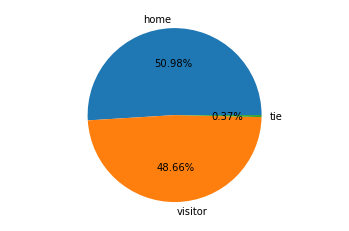

In [186]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis('equal')

ax.pie(your_values, labels = your_labels, autopct='%1.2f%%')
plt.show()

# What is the success rate of extra point field goal attempts in 2019-2020?

In [187]:
plays = pd.read_csv("./FOOTBALL/plays.csv")

In [188]:
# This is the win and loss percentage for 2019 and 2020.
wins_losses_data['year'].unique()

array([2022, 2021, 2020, 2019], dtype=int64)

In [189]:
# We ll just look at the 2019-2020 season. 
wins_losses_data[wins_losses_data['year'].isin([2019, 2020])]

,year,vis_team,home_team,home_score,vis_score,winning_team
7714,2020,CLE,TEN,35,41,visitor
7715,2020,MIN,SFO,27,10,home
7716,2020,BAL,IND,10,24,visitor
7717,2020,CLE,NYG,6,20,visitor
7718,2020,ATL,DAL,40,39,home
...,...,...,...,...,...,...
19968,2019,LVR,KAN,40,9,home
19969,2019,TEN,LVR,21,42,visitor
19970,2019,JAX,LVR,16,20,visitor
19971,2019,LVR,LAC,17,24,visitor


In [190]:
# Making a year column from the game id info.

plays['year'] = plays['game_id'].astype(str).str[:4]


In [191]:
# Number of times from 2019-2020 that a extra point kicked was missed
plays_19_20 = plays[plays['year'].isin(['2019', '2020'])]

plays_19_20['special_teams_result'].value_counts()


Kick Attempt Good           3466
Touchback                   3337
Return                      3310
Fair Catch                  1026
Downed                       517
Out of Bounds                416
Kick Attempt No Good         389
Muffed                       128
Non-Special Teams Result      64
Blocked Kick Attempt          46
Blocked Punt                  23
Kickoff Team Recovery         11
Name: special_teams_result, dtype: int64

In [192]:
# of the total kicks missed, how many were for extra point?

extra_point = plays_19_20[plays_19_20['special_teams_play_type'].isin(['Extra Point'])]
(extra_point['special_teams_result'].value_counts()/extra_point['special_teams_result'].count())*100


Kick Attempt Good           92.921551
Kick Attempt No Good         5.816050
Blocked Kick Attempt         0.901713
Non-Special Teams Result     0.360685
Name: special_teams_result, dtype: float64

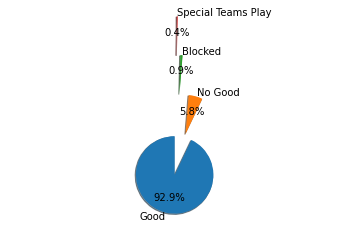

In [193]:
# Heres a pie chart showing the extra point kick success rate

labels = 'Good', 'No Good', 'Blocked', 'Special Teams Play'
sizes = [92.92, 5.82, 0.92, 0.36]
explode = (0.1, 1, 2, 3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [194]:
# I feel that 2021 season experienced higher than average made extra point kicks. Let check it out. 
plays_2021 = plays[plays['year'].isin(['2021'])]
extra_point_2021 = plays_2021[plays_2021['special_teams_play_type'].isin(['Extra Point'])]
(extra_point_2021['special_teams_result'].value_counts()/extra_point_2021['special_teams_result'].count())*100
# The above findings shows there were no blocked extra point field goal attempts in 2021.
# It appears the rate of missed extra point attempts was about the same from 2019-2020 compared to 2021. 


Kick Attempt Good       94.117647
Kick Attempt No Good     5.882353
Name: special_teams_result, dtype: float64

# What was the percentage of times teams went for it on 4th down in 2021? 

In [195]:
pbp_2021 = pd.read_csv("./FOOTBALL/pbp-2021.csv")
# 4th down data for 2021
last_down_data = pbp_2021[pbp_2021['formation'].isin(['SHOTGUN', 'UNDER CENTER', 'NO HUDDLE SHOTGUN', 'NO HUDDLE'])]
# Here is the success rate of 4th downs
last_down = last_down_data[['quarter', 'down', 'description', 'togo', 'yards', 'formation', 'offense_team', 'play_type']]

In [196]:
# All 4th down instances. No punts or field goals included. 
last_down_down = last_down[last_down['down'].isin([4])]
last_down_down.tail()

,quarter,down,description,togo,yards,formation,offense_team,play_type
42631,3,4,(10:59) 9-J.BURROW RIGHT GUARD TO MIN 23 FOR 2...,1,2,UNDER CENTER,CIN,RUSH
42709,4,4,(3:20) (SHOTGUN) 2-Z.WILSON PASS DEEP LEFT TO ...,8,25,SHOTGUN,NYJ,PASS
42716,4,4,"(4:36) (PUNT FORMATION) PENALTY ON CAR, OFFENS...",9,0,UNDER CENTER,CAR,PUNT
42748,1,4,(12:06) 71-L.STENBERG REPORTED IN AS ELIGIBLE....,2,-1,UNDER CENTER,DET,RUSH
42779,4,4,(:37) (SHOTGUN) 8-K.COUSINS PASS SHORT MIDDLE ...,4,6,SHOTGUN,MIN,PASS


In [197]:
# Here is all the plays where a team went for it on 4th down
last_plays = last_down[last_down['down'].isin([4])]
# Out of the times a team decided to go for it on 4th. This is their success rate of picking up the down
success_rate = np.where(last_plays["yards"] >= last_plays["togo"], True, False)
(last_plays['yards'] >= last_plays['togo']).mean()*100

41.43019296254257

In [198]:
# What is the chances a team goes for it on 4th or decides to punt/kick?
formation_index = last_down_data['formation'].value_counts()
formation_index
# If a team was in any formation, besides punt and field goal, they were lined up to go for the 4th down.

SHOTGUN              18430
UNDER CENTER         17047
NO HUDDLE SHOTGUN     2926
NO HUDDLE              633
Name: formation, dtype: int64

In [199]:
# This is all the relavent data covering times where teams were sucessful on 4th down.
success_rate_data = last_plays[last_plays['yards']>=last_plays['togo']]

In [200]:
# how often did teams rush, pass, or scramble on 4th down successes?
success_rate_data['play_type'].value_counts()

PASS        198
RUSH        151
SCRAMBLE     16
Name: play_type, dtype: int64

In [201]:
# percentages of the above. 
(success_rate_data['play_type'].value_counts()/success_rate_data['play_type'].count())*100


PASS        54.246575
RUSH        41.369863
SCRAMBLE     4.383562
Name: play_type, dtype: float64

In [202]:
# Teams that successfully completed a 4th down attempt gained on average 9.2 yards. Teams went for it on average about 3 yards out.
success_rate_data[["yards", "togo"]].mean()

yards    9.213699
togo     2.983562
dtype: float64

In [203]:
last_plays['quarter'].value_counts()

4    396
2    191
3    160
1    127
5      7
Name: quarter, dtype: int64

In [204]:
success_rate_data['quarter'].value_counts()

4    150
2     81
3     69
1     61
5      4
Name: quarter, dtype: int64

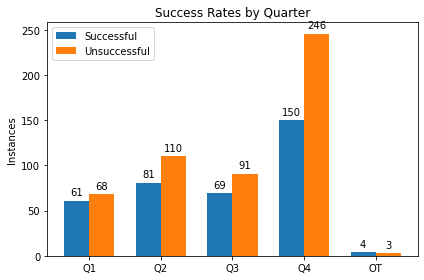

In [205]:
# Heres a bar chart showing all the successful and unsuccessful 4th down conversions by quarter.
#Teams tend to take more chance and go for it in the 2nd and 4th quarter.

labels = ['Q1', 'Q2', 'Q3', 'Q4', 'OT']
successful = [61, 81, 69, 150, 4]
unsuccessful = [68, 110, 91, 246, 3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, successful, width, label='Successful')
rects2 = ax.bar(x + width/2, unsuccessful, width, label='Unsuccessful')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Instances')
ax.set_title('Success Rates by Quarter')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


fig.tight_layout()

plt.show()